# Variables aleatorias discretas

**EJEMPLO: Tengo una caja con 3 bolitas azules y 5 rojas. El experimento es sacar 3 bolitas sin reposición. $X$ mide la cantidad de bolitas azules que sacamos.**

Calculamos $p_X$:

$P(X=0)=p_X(0) = \frac{10}{56}$


$P(X=1)=p_X(1) = \frac{30}{56}$


$P(X=2)=p_X(2) = \frac{15}{56}$


$P(X=3)=p_X(3) = \frac{1}{56}$

La fórmula para $p_X$ es $$p_X(k) = \frac{{5 \choose 3-k}{3 \choose k}}{{8\choose3}}$$

In [30]:
p_X <- function(x)
    {
    if (x %in% 0:3)
        ans <-(choose(5, 3-x)*choose(3,x))/choose(8,3)
    else
        ans <- 0
    ans
    }

R_X = 0:3

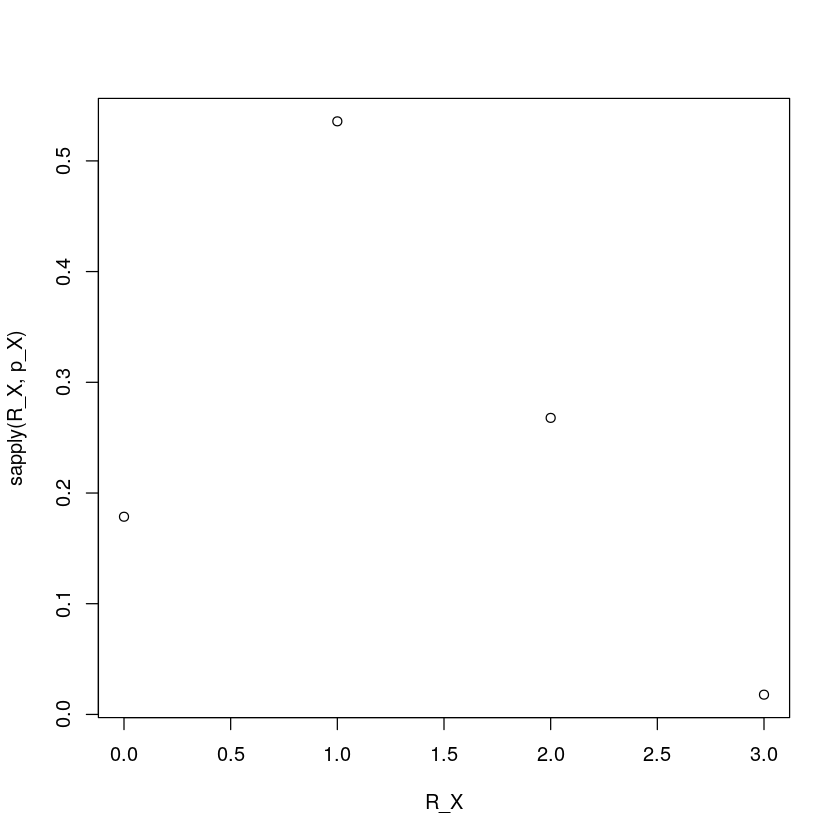

In [34]:
plot(R_X, sapply(R_X, p_X))

Armamos la función de distibución acumulada $F_X$

$F_X(x) = \begin{cases}
0 & \text{si }x<0\\
\frac{10}{56} & \text{si }0\leq x<1\\
\frac{40}{56} & \text{si }1\leq x<2\\
\frac{55}{56} & \text{si }2\leq x<3\\
1 & \text{si }3\leq x\\
\end{cases}$

In [35]:
F_X <- function(x){
    acum = 0
    if (x>= 0 & x<=3) 
        acum <- sum(sapply(0:x, p_X))
    if (x>3)
        acum <-1
    acum
}

In [39]:
F_X(2.4)

[1] 0.9821429

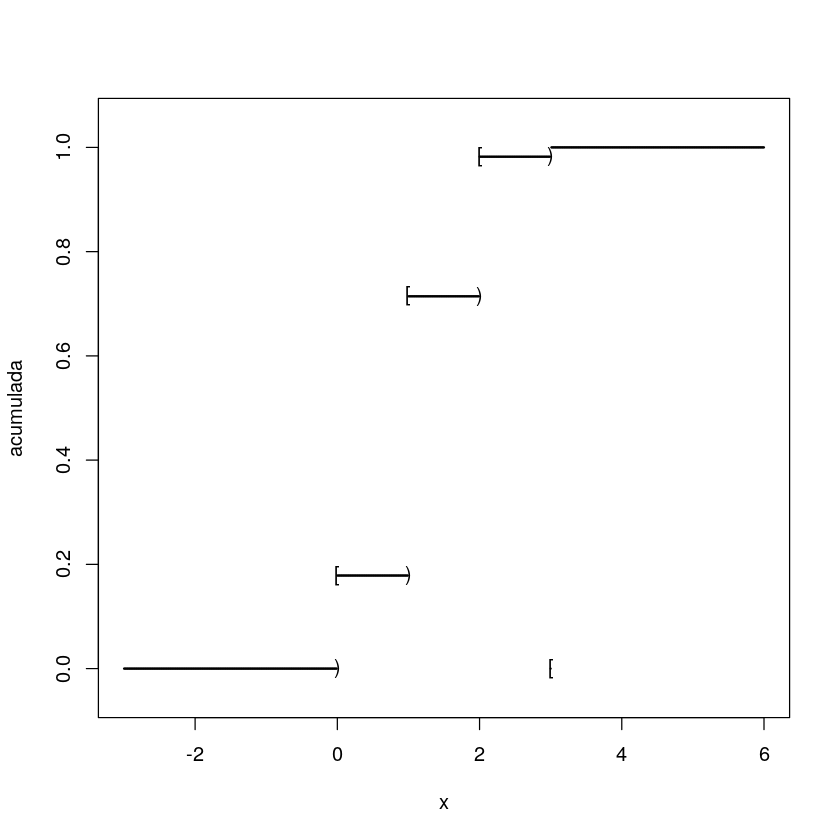

In [15]:
x <- seq(-3,6, length = 1000)
acumulada <- sapply(x, F_X)


plot(x, acumulada, ylim = c(-0.05,1.05), cex=0.1)

for (x in R_X)
    {
    text(x,F_X(x), "[")
    text(x,F_X(x-0.01), ")")
}

Si queremos simular $X$

In [45]:
sample(R_X, 1, prob = sapply(R_X, p_X))

[1] 1

Simulamos $E(X)$

In [32]:
set.seed(1234)

n_rep = seq(10,100000, length = 100)

simulacion <- rep(NA, 100)


for (i in 1:100)
{
    simulacion[i] <- mean(replicate(n_rep[i], sample(R_X, 1, prob = sapply(R_X, p_X))))
}


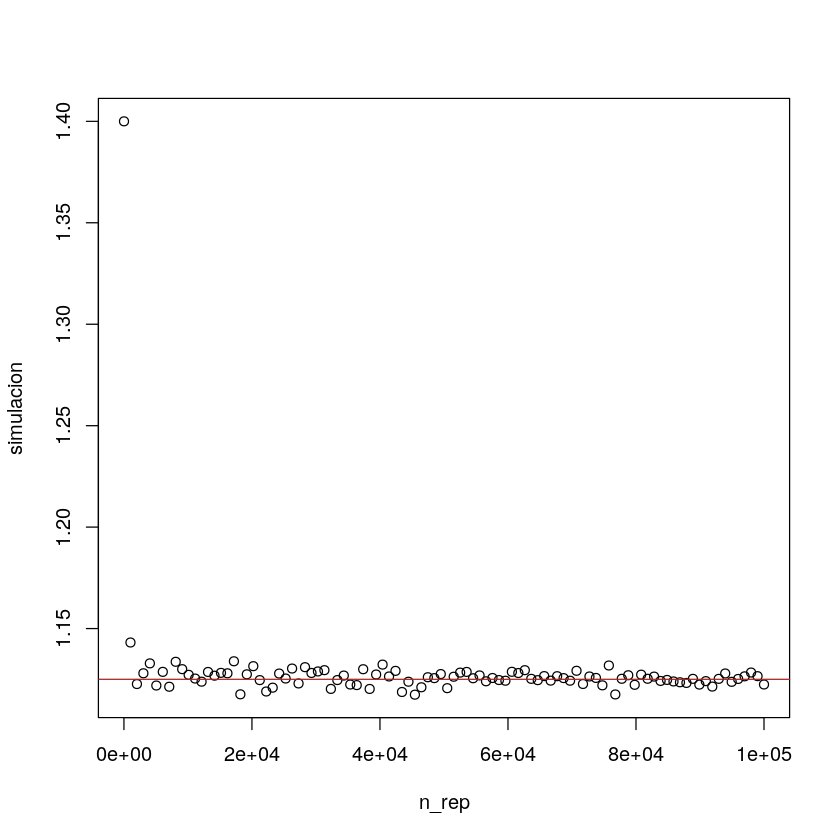

In [33]:
plot(n_rep, simulacion)
abline(h=63/56,col="red")